<a href="https://colab.research.google.com/github/ruhmmachaudhary-rgb/Digit_Recognition_CNN/blob/main/cv_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification using CNN
1. Data Loading and Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report
#from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
# Load train and test datasets
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

# Show confirmation
print(" Data Loaded Successfully!")
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

 Data Loaded Successfully!
Training data shape: (42000, 785)
Test data shape: (28000, 784)


In [ ]:
# Display first 5 rows of training data
print("First 5 rows of training data:")
train_df.head()

First 5 rows of training data:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


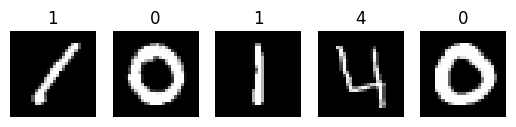

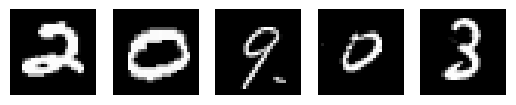

In [ ]:
# 3. Visualizing some images from train and test data
# Show first 5 images from train
for i in range(5):
    label = train_df.iloc[i, 0]
    img = train_df.iloc[i, 1:].values.reshape(28, 28)
    plt.subplot(1, 5, i+1)  # plt.subplot(rows, columns, index)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.show()

# Show first 5 images from test
for i in range(5):
    img = test_df.iloc[i].values.reshape(28, 28)
    plt.subplot(1, 5, i+1) # plt.subplot(rows, columns, index)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


2- data preprocessing

In [ ]:
# Separate features (X) and labels (y)
X = train_df.drop('label', axis=1)  # All columns except label
y = train_df['label']               # Only the label column

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (42000, 784)
Labels shape: (42000,)


In [ ]:
# # Calculate mean and std for each pixel column
# mean = X.mean()
# std = X.std()

# # Standardize (zero mean, unit variance)
# X_standardized = (X - mean) / std

# print("Mean after standardization (approx):", X_standardized.mean().mean())
# print("Std after standardization (approx):", X_standardized.std().mean())


In [ ]:
# standarazing the faeture
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)  # X can be a DataFrame or numpy array

print("Mean after standardization (approx):", X_standardized.mean())
print("Std after standardization (approx):", X_standardized.std())


Mean after standardization (approx): 7.390360324574467e-19
Std after standardization (approx): 0.9502953354035759


In [ ]:
y_one_hot = to_categorical(y)


In [ ]:
# Assuming X_standardized is a NumPy array or can be converted to one
X_np = X_standardized  # If already numpy array; otherwise use X_standardized.values if DataFrame

# Reshape to (num_samples, height, width, channels)
# For example, if images are 28x28 pixels grayscale:
X_reshaped = X_np.reshape(-1, 28, 28, 1)

print("Reshaped shape:", X_reshaped.shape)

# X_scaled = X_scaled.reshape(-1 , 28 , 28 , 1)

Reshaped shape: (42000, 28, 28, 1)


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_one_hot, test_size=0.2, random_state=42
)


In [ ]:
# # ===== Data Augmentation =====
# datagen = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1
#     )
# datagen.fit(X_train)

3. Model Building

In [ ]:
model = Sequential()

# 1st convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output to feed into dense layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer: number of classes depends on your problem (e.g., 10 for digits 0-9)
# Output layer with softmax activation for multi-class classification (10 classes)
model.add(Dense(10, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


4. Model Training


In [ ]:
history = model.fit(
    X_reshaped,
    y_one_hot,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1

)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.8306 - loss: 0.5443 - val_accuracy: 0.9789 - val_loss: 0.0693
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.9702 - loss: 0.1016 - val_accuracy: 0.9855 - val_loss: 0.0484
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.9783 - loss: 0.0728 - val_accuracy: 0.9868 - val_loss: 0.0427
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.9845 - loss: 0.0505 - val_accuracy: 0.9886 - val_loss: 0.0410
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9856 - loss: 0.0462 - val_accuracy: 0.9898 - val_loss: 0.0400
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 0.9878 - loss: 0.0385 - val_accuracy: 0.9895 - val_loss: 0.0389
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - accuracy: 0.9890 - loss: 0.0328 - val_accuracy: 0.9899 - val_loss: 0.0424
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 31ms/step - accuracy: 0.9914 -

In [ ]:
 model.save("cv_model.keras")

5. Evaluation

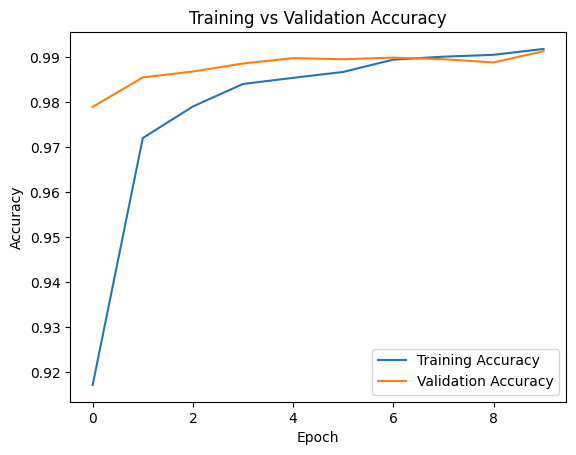

In [ ]:
 # plot training and validation accuracy:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



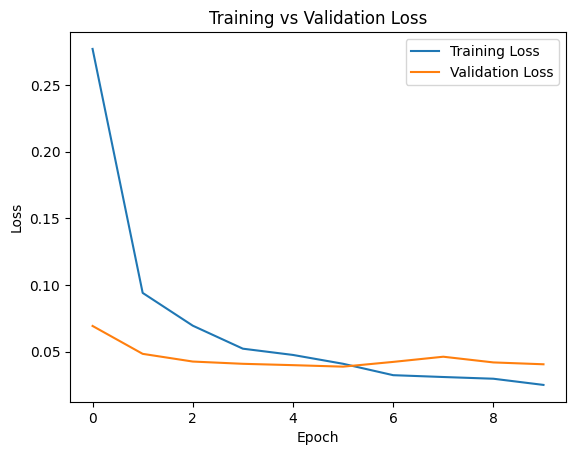

In [ ]:
#  Plot training vs. validation loss.

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Step 1: Predict probabilities on test set
y_pred_probs = model.predict(X_test)

# Step 2: Convert predicted probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 3: Convert y_test to class indices if it is one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Step 4: Calculate accuracy manually
accuracy = np.mean(y_pred == y_true)
print(f"Test Accuracy: {accuracy:.4f}")


263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Test Accuracy: 0.9974


6. Advanced Analysis

In [ ]:

# Predict class probabilities on test data
y_pred_probs = model.predict(X_test)

# Convert predicted probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)   # Get predicted class by selecting highest probability

# Convert true labels to class indices if they are one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Generate classification report
report = classification_report(y_true, y_pred)
print(report)


263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       816
           1       1.00      1.00      1.00       909
           2       1.00      1.00      1.00       846
           3       1.00      1.00      1.00       937
           4       1.00      1.00      1.00       839
           5       1.00      1.00      1.00       702
           6       1.00      1.00      1.00       785
           7       1.00      0.99      1.00       893
           8       1.00      1.00      1.00       835
           9       0.99      1.00      1.00       838

    accuracy                           1.00      8400
   macro avg       1.00      1.00      1.00      8400
weighted avg       1.00      1.00      1.00      8400



In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import io

# CONFIG
IMAGE_HEIGHT, IMAGE_WIDTH = 28, 28
MODEL_PATH = "cv_model.keras"   # trained model from Colab
TEST_CSV_PATH = "test.csv"       # unscaled test.csv

# ===== LOAD MODEL =====
model = tf.keras.models.load_model(MODEL_PATH)

# ===== LOAD TEST DATA =====
test_df = pd.read_csv(TEST_CSV_PATH)

# If CSV has labels, drop them here (adjust column name if needed)
if "label" in test_df.columns:
    test_df = test_df.drop(columns=["label"])

# ===== Prediction Function =====
def predict_random_sample():
    try:
        # Pick a random row
        random_idx = random.randint(0, len(test_df) - 1)
        sample = test_df.iloc[random_idx].values

        # Check shape
        if sample.shape[0] != IMAGE_HEIGHT * IMAGE_WIDTH:
            return None, " Error: CSV row does not match 28x28 image size.", None

        # Prepare image for display
        image_array = sample.reshape(IMAGE_HEIGHT, IMAGE_WIDTH)

        # Manual scaling
        sample_scaled = image_array / 255.0
        sample_scaled = sample_scaled.reshape(1, IMAGE_HEIGHT, IMAGE_WIDTH, 1)

        # Predict
        prediction = model.predict(sample_scaled)
        predicted_label = int(np.argmax(prediction))

        # Return image, label, and prediction scores
        return image_array, f"Prediction: {predicted_label}", {f"Class {i}": float(score) for i, score in enumerate(prediction[0])}

    except Exception as e:
        return None, f" Error: {str(e)}", None

# ===== Gradio Interface =====
with gr.Blocks() as demo:
    gr.Markdown("## CNN Prediction from Test CSV (Manual Scaling)")
    gr.Markdown("Click the button to pick a random row from `test.csv`, scale it manually, and predict.")

    with gr.Row():
        img_output = gr.Image(type="numpy", label="Random Test Sample")
        label_output = gr.Textbox(label="Predicted Label")
        # chart_output = gr.Label(label="Prediction Probabilities")

    predict_btn = gr.Button("Pick a Random Test Sample")
    predict_btn.click(predict_random_sample, inputs=None, outputs=[img_output, label_output, chart_output])

demo.launch()
